In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

data_folder = "/data/NFS/andy_data/LIDC_IDRI/classification/data3_1"

In [2]:
def load_data(df, index, imgs_path, augment=False):
    imgs = []
    labels = []
    for i in range(len(imgs_path)):
        if augment:
            num = int(imgs_path[i][61:-9])
        else:
            num = int(imgs_path[i][60:-7])
        if num in index:
            labels.append(int(df[df["nodule_number"]==num]["malignancy"]))
            img = np.load(imgs_path[i])
#             img = img[np.newaxis, :, :]
            imgs.append(img)
    imgs = np.array(imgs)
    labels = np.array(labels)
    return imgs, labels

In [3]:
df = pd.read_csv(data_folder + "/final_annotation.csv")
df_ma = df[df["malignancy"]==1]
df_be = df[df["malignancy"]==0]

imgs_path = glob(data_folder + "/images/*.npy")
imgs_path.sort()

index_ma = df_ma["nodule_number"].values
index_be = df_be["nodule_number"].values

imgs_ma, labels_ma = load_data(df, index_ma, imgs_path)
imgs_be, labels_be = load_data(df, index_be, imgs_path)
print(imgs_ma.shape, imgs_be.shape)

(4680, 32, 32) (3080, 32, 32)


In [4]:
imgs_ma = imgs_ma.reshape(imgs_ma.shape[0], -1)
imgs_be = imgs_be.reshape(imgs_be.shape[0], -1)
print(imgs_ma.shape, imgs_be.shape)

(4680, 1024) (3080, 1024)


In [5]:
pca = PCA(n_components=2)
new_imgs_ma = pca.fit_transform(imgs_ma)
new_imgs_be = pca.fit_transform(imgs_be)
print(new_imgs_ma.shape, new_imgs_be.shape)

(4680, 2) (3080, 2)


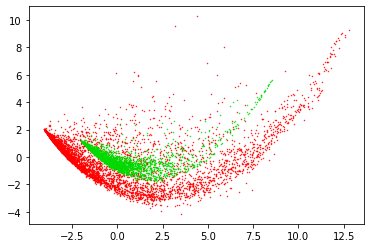

In [6]:
plt.scatter(new_imgs_ma[:,0], new_imgs_ma[:,1], s=0.2, c="#FF0000")
plt.scatter(new_imgs_be[:,0], new_imgs_be[:,1], s=0.2, c="#00DB00")
plt.show()

In [7]:
df = pd.read_csv(data_folder + "/final_annotation.csv")
df = df[df["malignancy"]!=2]
index = df["nodule_number"].values
imgs, labels = load_data(df, index, imgs_path)
print(imgs.shape)

(7760, 32, 32)


In [8]:
imgs = imgs.reshape(imgs.shape[0], -1)

In [9]:
pca = PCA(n_components=2)
new_imgs = pca.fit_transform(imgs)

In [65]:
for i in range(len(labels)):
    if labels[i] == 1:

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [67]:
labels[0]

array([1])

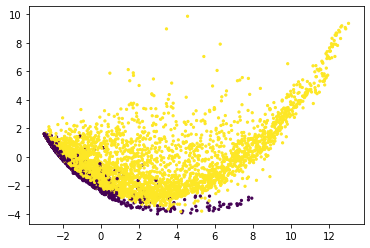

In [10]:
plt.scatter(new_imgs[:,0], new_imgs[:,1], s=5, c=labels)
plt.show()